# GG274 Homework 7: Summary Statistics, Histograms and Simulation


## Logistics

**Due date**: The homework is due 23:59 on Monday, March 03.

You will submit your work on [MarkUs](https://markus.teach.cs.toronto.edu/markus/main/login_remote_auth).
To submit your work:

1. Download this file (`Homework_7.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw7** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)
All homeworks will take place in a Jupyter notebook (like this one). When you are done, you will download this notebook and submit it to MarkUs.

## Introduction

For this week's homework, we'll investigate the behaviour of sample statistics and distributions as we vary our sample size. Specifically, we'll be investigating the mean amount of time spent cleaning by respondents. Furthermore, we will extend our analysis by studying how our sample mean estimate tends to change when we take samples of increasing sizes.

## Question

_Question: How much time on average do respondents spend on indoor house cleaning?  How does our estimate of a sample mean change as we take increasingly larger samples?_


## Instructions and Learning Objectives

In this homework, you will:
* Work with the Time Use dataset from lecture to investigate properties of sampling means as the sample size changes
  
* Create and modify for loops and functions to run sampling simulations
  
* Visualize data using histograms and scatter plots

## Task 1 - Read in data

The Data part of your notebook should read the raw data, extract a `DataFrame` containing the important columns, rename the columns, and filter out missing values.

You might find it helpful to name intermediate values in your algorithms. That way you can examine them to make sure they have the type you expect and that they look like what you expect. Very helpful when debugging!

## Step 1

Create the following pandas `DataFrame`s:

+ `time_use_data_raw`: the `DataFrame` created by reading the `gss_tu2016_week7.csv` file. __(1 mark)__


+ `time_use_dur`: the `DataFrame` containing the following columns from `time_use_data_raw`: `CASEID`, `dur18`. __(1 mark)__ (We test this after any changes are made to it. We do not check the initial value.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample solution, delete to create handout


time_use_data_raw = pd.read_csv("gss_tu2016_week7.csv")

time_use_dur = time_use_data_raw[["CASEID", "dur18"]]

## Step 2

`time_use_dur` could use more informative column names. 

Replace `CASEID` and `dur18` in `time_use_dur` by 

+ creating a dictionary `new_column_names` that maps the column names from `time_use_dur` to the values `"participant_id"` and `"time_spent_cleaning"`. __(1 mark)__

+ create a new `DataFrame` stored in `time_use_data` that is a copy of `time_use_dur`, but with the columns renamed using `new_column_names`. __(1 mark)__

In [3]:
# Sample solution, delete to create handout
new_column_names = {
    "CASEID": "participant_id",
    "dur18": "time_spent_cleaning",
}

time_use_data = time_use_dur.copy()

time_use_data.rename(columns=new_column_names, inplace=True)

time_use_data

,participant_id,time_spent_cleaning
0,10000,0
1,10001,0
2,10002,120
3,10003,0
4,10004,0
...,...,...
17385,27385,0
17386,27386,0
17387,27387,30
17388,27388,10


In [4]:
# Step 2 check that you have the correct column names
# leave this for students to check work

expected_columnnames = ["participant_id", "time_spent_cleaning"]

try:
    assert expected_columnnames == list(time_use_data.columns)
    print("Column names are correct!")
except:
    print("Something is wrong, check your column names")


Column names are correct!


## Task 2 - Compute and Visualize Distribution

### Step 1

Compute the distribution of the column `time_spent_cleaning` for respondents that spent at least some time cleaning (i.e., had a non-zero value of `time_spent_cleaning`) in `time_use_data` using the `describe` function.  To do this 

- Create a pandas `Series` called `clean_nonzero` that only has respondents with non-zero values of `time_spent_cleaning`.  
  
- Use the `describe` function to describe the distribution of `time_spent_cleaning`, and store the results in a variable called `summary_stats`.

In [5]:
clean_nonzero = time_use_data[time_use_data["time_spent_cleaning"] > 0]["time_spent_cleaning"]

summary_stats = clean_nonzero.describe()

summary_stats

count    7154.000000
mean       91.095192
std        94.963051
min         5.000000
25%        30.000000
50%        60.000000
75%       120.000000
max       855.000000
Name: time_spent_cleaning, dtype: float64

### Step 2


Visualize `clean_nonzero` column by creating a histogram using `maptplotlib` with the following parameters: 

```
bins=time_bins, linewidth = 1.3, edgecolor="black", color="white"

```

Label the horizontal axis (x-axis) `Time spent cleaning (minutes)`.

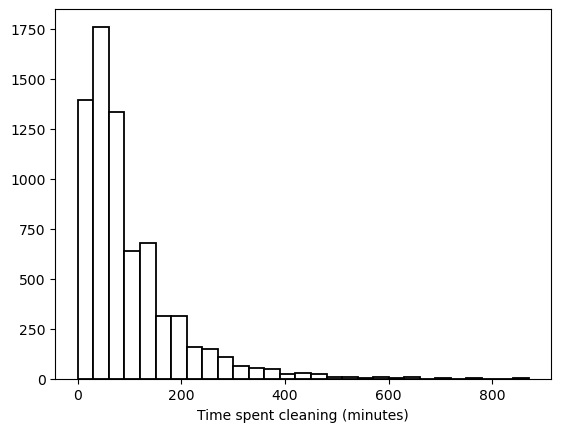

In [6]:
# Sample solution
time_bins = np.arange(start=0, stop=900, step=30)

plt.hist(
    clean_nonzero, 
    bins=time_bins, 
    linewidth = 1.3, 
    edgecolor="black", 
    color="white");

plt.xlabel("Time spent cleaning (minutes)");


### Step 3

In a markdown cell, describe the distribution of data, pointing out features like mode (where most observations lie), skew (the shape of the distribution symmetric or not), and potential outliers. Do our results make sense given what we know about time spent on daily cleaning?

Are there any strange values? Specifically, does it make sense that there are more people that spend less/more than 30 minutes cleaning in a day than those who spend more than 4 hours? Briefly explain.
__(2 marks)__


> From the histogram, you can tell that the data is **right-skewed** (or a decreasing shape; you don't need to use the exact term), ranges between 0 and just above 800, centred around the lower end (0~200), etc. 
>
> There is a large number of values in the first bar which starts at 0 minute and ends at 30 minutes. It's not surprising that there are more people who spend less than 30 minutes than those who spend more than 4 hours. What's suprising is that there are a few who spend more than 10 hours cleaning indoors. 
>
> Or one may argue that it's surprising to see there are so many people who don't spend much time cleaning their home indoors. Perhaps, they were cleaning while doing other activities and didn't indicate their cleaning activity.
>
> Any reasonable explanation based on the context would be acceptable.
>

## Task 3: Compute the empirical mean

The **empirical mean** is the mean of all observed data. In this homework, we distinguish this from the **sample mean** which is the mean of a sample or portion of all data.

Compute the empirical mean time spent cleaning by respondents and name it `empirical_mean_time_spent_cleaning`. __(1 mark)__


In [7]:
# Sample solution, delete to create handout
empirical_mean_time_spent_cleaning = clean_nonzero.mean()

empirical_mean_time_spent_cleaning

91.09519150125804

## Task 4: Set up a Simulation Experiment

You will investigate the behaviour of sample means for the following sample sizes:

5, 10, 20, 50, 100, 200, 500, and 1000.

### Step 1 - Specify Sample Sizes

Create a `numpy` array named `sample_sizes` with the aforementioned values in the specified order using `np.array()`. __(1 mark)__

In [8]:
# Sample solution
sample_sizes = np.array([5, 10, 20, 50, 100, 200, 500, 1000])

### Step 2 - Simulating Sample Means

In this part, you will complete a function that creates and returns a list of the sample means of the sample draws.

Name the function `simulate_sample_means`. 

The function will have two arguments: 
+ `data`: a `pandas` `Series` or column of a `DataFrame` that we are sampling
+ `N`: an `int`, the size of the sample we draw

Your function should make and return a list of 100 sample means of size `N` from `data`. Sample *without* replacement.

The function will return a list. The list will be of size 100, with each element in the list representing the sample *mean* from the sample of size N.  
*Hint: Initialize an empty list used to store the sample means. Inside your for loop generate a sample from the data, calculate the sample mean, and append it to your list.*

In [9]:
# Sample solution, delete to create handout

def simulate_sample_means(data, N):
    '''Return a list of 100 sample means from a sample of size N from data.'''
    
    # This next statement is for reproducability: each random number is generated
    # mathematically based on the previous random number, and we can say which
    # number to start with when we call sample. This allows us to have reproducability
    # with "random" numbers and so we can autotest! Yay!
    seed = 0

    # Here, create any variables that needs to be updated inside the loop.
    sample_means = []
    
    # generate a sample of size N and compute sample mean.
    # append the sample mean to the list of sample means.
    # repeat 100 times.
    
    for _ in range(100):
        seed += 5 # Don't change this line
        
        # Here, write code to:
        # 1) Take a sample of data, and calculate the sample mean.
        #    When you call .sample, make sure you use random_state=seed as one of the
        #    arguments.
        # 2) Append the sample mean to the list of sample means.
        sample_mean = data.sample(N, replace=False, random_state=seed).mean()
        
        sample_means.append(sample_mean)
        
    return sample_means


In [10]:
simulate_sample_means(clean_nonzero, 5)

[102.0,
 103.0,
 70.0,
 53.0,
 200.0,
 47.0,
 140.0,
 106.0,
 77.0,
 46.0,
 70.0,
 159.0,
 84.0,
 52.0,
 49.0,
 93.0,
 82.0,
 33.0,
 68.0,
 108.0,
 42.0,
 63.0,
 49.0,
 58.0,
 126.0,
 83.0,
 163.0,
 41.0,
 79.0,
 133.0,
 70.0,
 45.0,
 147.0,
 90.0,
 37.0,
 62.0,
 67.0,
 154.0,
 34.0,
 90.0,
 62.0,
 46.0,
 94.0,
 61.0,
 27.0,
 71.0,
 60.0,
 108.0,
 68.0,
 41.0,
 93.0,
 34.0,
 23.0,
 209.0,
 65.0,
 66.0,
 111.0,
 65.0,
 130.0,
 98.0,
 68.0,
 86.0,
 174.0,
 139.0,
 53.0,
 72.0,
 53.0,
 63.0,
 75.0,
 89.0,
 55.0,
 117.0,
 73.0,
 53.0,
 115.0,
 204.0,
 163.0,
 42.0,
 57.0,
 56.0,
 62.0,
 46.0,
 133.0,
 113.0,
 92.0,
 32.0,
 63.0,
 60.0,
 60.0,
 106.0,
 200.0,
 45.0,
 104.0,
 100.0,
 165.0,
 51.0,
 45.0,
 63.0,
 67.8,
 124.0]

## Task 5 - Simulate Sample Means

In this part, you will complete a code block that computes and compiles simulated means for each sample size.

For each sample size in `sample_sizes`, call function `simulate_sample_means` from the previous step to calculate 100 sample means at that sample size. You're going to build a dictionary where each key is a sample size and each value is the corresponding list of means that `simulate_sample_means` returned.

### Accumulating information in a dictionary
Remember in lecture we used a for loop to add up a series of numbers? And then we used a for loop to accumulate a list of means? As it turns out, you can use the same technique to make a dictionary.

Here's how you add a key/value pair to a dictionary (this is also called "inserting"):

In [11]:
d = {} # this creates an empty dictionary named "d"
d["key1"] = "value1"
d

{'key1': 'value1'}

In [12]:
d["key2"] = "value2"
d

{'key1': 'value1', 'key2': 'value2'}

In [13]:
d["key1"] = "new_value"
d

{'key1': 'new_value', 'key2': 'value2'}

You can accumulate a new dictionary using a for loop:

In [14]:
ta_to_course = {}
for name in ["Ibrahim", "Adrienne", "Asana", "Yifeng", "Yongxin"]:
    ta_to_course[name] = 'GGR274'

ta_to_course

{'Ibrahim': 'GGR274',
 'Adrienne': 'GGR274',
 'Asana': 'GGR274',
 'Yifeng': 'GGR274',
 'Yongxin': 'GGR274'}

In [15]:
for name in ["Meng", "Alan"]:
    ta_to_course[name] = 'EEB125'

ta_to_course

{'Ibrahim': 'GGR274',
 'Adrienne': 'GGR274',
 'Asana': 'GGR274',
 'Yifeng': 'GGR274',
 'Yongxin': 'GGR274',
 'Meng': 'EEB125',
 'Alan': 'EEB125'}

In [16]:
# use "key" to access the associated value
ta_to_course["Meng"]

'EEB125'

### Step 1 - Create a dictionary of simulated means for each sample size

As you loop through each element in `sample_sizes` (you can loop through the `numpy` array as you would a list), you will pass the current sample size to the function `simulate_sample_means` (specifically, the argument `N`). You will be sampling from the cleaned dataset, so make sure to pass the value of `clean_nonzero` to the `data` parameter.

The result of calling `simulate_sample_means` is a list of means. Add a new key/value pair to `all_sample_means_by_sample_size`. The key is the current sample size and the value is the list of means.

Finally we will be checking this in the autotester:
+ `all_sample_means_by_sample_size`: a dictionary mapping the sample sizes to a list of 100 sample means. _Because we'll use the same random seed, we'll get the same "random" sequence. That means that we can autotest it._ __(2 marks)__

In [17]:
# Sample solution

all_sample_means_by_sample_size = {}

for sample_size in sample_sizes:
        
    mean_at_sample_mean = simulate_sample_means(
        data=clean_nonzero, 
        N=sample_size)
        
    all_sample_means_by_sample_size[sample_size] = mean_at_sample_mean

## Step 2 - Answer this question

Briefly explain what the keys and values represent in the dictionary `all_sample_means_by_sample_size`.  
+  You can inspect the keys by using the `keys` method `all_sample_means_by_sample_size.keys()`.
+  You can inspect the values by using the `values` method `all_sample_means_by_sample_size.values()`.

In [18]:
print(all_sample_means_by_sample_size.keys())
print(all_sample_means_by_sample_size.values())

dict_keys([5, 10, 20, 50, 100, 200, 500, 1000])
dict_values([[102.0, 103.0, 70.0, 53.0, 200.0, 47.0, 140.0, 106.0, 77.0, 46.0, 70.0, 159.0, 84.0, 52.0, 49.0, 93.0, 82.0, 33.0, 68.0, 108.0, 42.0, 63.0, 49.0, 58.0, 126.0, 83.0, 163.0, 41.0, 79.0, 133.0, 70.0, 45.0, 147.0, 90.0, 37.0, 62.0, 67.0, 154.0, 34.0, 90.0, 62.0, 46.0, 94.0, 61.0, 27.0, 71.0, 60.0, 108.0, 68.0, 41.0, 93.0, 34.0, 23.0, 209.0, 65.0, 66.0, 111.0, 65.0, 130.0, 98.0, 68.0, 86.0, 174.0, 139.0, 53.0, 72.0, 53.0, 63.0, 75.0, 89.0, 55.0, 117.0, 73.0, 53.0, 115.0, 204.0, 163.0, 42.0, 57.0, 56.0, 62.0, 46.0, 133.0, 113.0, 92.0, 32.0, 63.0, 60.0, 60.0, 106.0, 200.0, 45.0, 104.0, 100.0, 165.0, 51.0, 45.0, 63.0, 67.8, 124.0], [123.5, 99.0, 74.5, 65.5, 130.0, 72.0, 112.0, 84.0, 88.5, 70.5, 62.0, 128.5, 100.5, 96.5, 92.0, 73.0, 90.5, 47.0, 106.0, 82.5, 41.0, 83.5, 69.5, 55.5, 102.0, 140.0, 162.0, 68.0, 72.0, 130.0, 63.5, 83.5, 113.0, 113.0, 62.0, 101.0, 68.0, 126.0, 109.0, 69.0, 107.0, 86.0, 87.5, 89.5, 69.0, 69.0, 57.0, 93.0, 56

> The `keys` in the dictionary represent the sample size used to simulate the `values`. Note that the `keys` have 8 numbers and `values` have 8 list of 100 simulated values using the sample sizes in the corresponding `keys`.)

## Task 6 - Plot the results

### Step 1: Create Data for Plotting

In this section you will calculate the mean of simulation. 

Create the following variables:

+ `sample_means_by_sample_size`: a `DataFrame` created from the dictionary `all_sample_means_by_sample_size`. __(1 mark)__

+ `mean_of_sample_means_by_sample_size`: compute the column means of `sample_means_by_sample_size`, that is the mean sample means at each sample size. __(1 mark)__ 

+ `diff_sample_mean_empirical_means_by_sample_size`: the difference between mean of sample means and the empirical mean at each sample size. __(1 mark)__

In [19]:
sample_means_by_sample_size = pd.DataFrame(all_sample_means_by_sample_size)

mean_of_sample_means_by_sample_size = sample_means_by_sample_size.mean()

diff_sample_mean_empirical_means_by_sample_size = (
    mean_of_sample_means_by_sample_size - empirical_mean_time_spent_cleaning)


### Step 2: Plot the data

In this section you will plot the results.

Create a scatter plot using `matplotlib` with 

- `diff_sample_mean_empirical_means_by_sample_size.index` on the horizontal axis (x-axis) and 
  
- `diff_sample_mean_empirical_means_by_sample_size` on the vertical axis (y-axis)

by completing the code below. You may find the [reference page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) of `matplotlib.pyplot.scatter()` helpful.


Label the horizontal axis with the text `Sample size` and the vertical axis with the text `Difference between sample mean and population mean`.

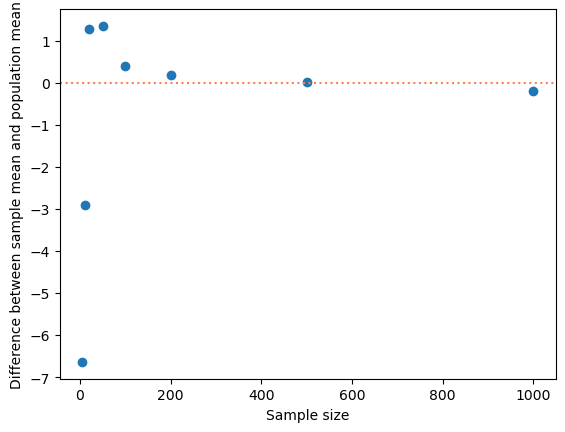

In [20]:
plt.axhline(y=0, linestyle=":", color="coral")
plt.scatter(
    diff_sample_mean_empirical_means_by_sample_size.index, 
    diff_sample_mean_empirical_means_by_sample_size);

plt.xlabel('Sample size');

plt.ylabel('Difference between sample mean and population mean');

## Task 7 - Answer the following Questions

Include cells with your answers to each of these questions:
 
1. What is the empirical mean time spent cleaning by respondents per day (in minutes). Does this value make sense? Why or why not? Answer in one line. __(1 mark)__

> The empirical mean time spent cleaning is stored in `empirical_mean_time_spent_cleaning`. It is approximately 91 minutes. It seems reasonable that people spend about an hour and a half cleaning per day on average. 
>
> (Any reasonable argument based on the context and the correct value is acceptable.)

2. Based on your final scatter plot, what trend or pattern do you notice between sample size and difference between the mean of sample means and empirical mean? Does the difference decrease or increase with sample size? Explain why this trend is seen, drawing on your understanding of randomness of sampling. __(2 marks)__

> As the sample size increases, the difference becomes closer to 0. This is due to the law of averages (or explain that with a larger sample size, a random sample is more likely to represent the population closesly.)



3. If you were to do further analysis to study how the time spent cleaning is different for various subpopulations, which additional sociodemographic variables might you consider? Why? Write 3-5 sentences identifying 1-2 variables (e.g. age - don't pick this!) of interest and what differences in cleaning time you might expect to find.

> (Any sociodemographic variable is acceptable with a reasonable expected difference identified.)